In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [35]:
data

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [36]:
feat_columns = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']

In [37]:
df = data[feat_columns].copy()

In [38]:
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_displacement,9704.0,199.708368,49.455319,10.000000,170.000000,200.000000,230.000000,380.000000
horsepower,8996.0,149.657292,29.879555,37.000000,130.000000,149.000000,170.000000,271.000000
vehicle_weight,9704.0,3001.280993,497.894860,952.681761,2666.248985,2993.226296,3334.957039,4739.077089
model_year,9704.0,2011.484027,6.659808,2000.000000,2006.000000,2012.000000,2017.000000,2023.000000
fuel_efficiency_mpg,9704.0,14.985243,2.556468,6.200971,13.267459,15.006037,16.707965,25.967222


<AxesSubplot: >

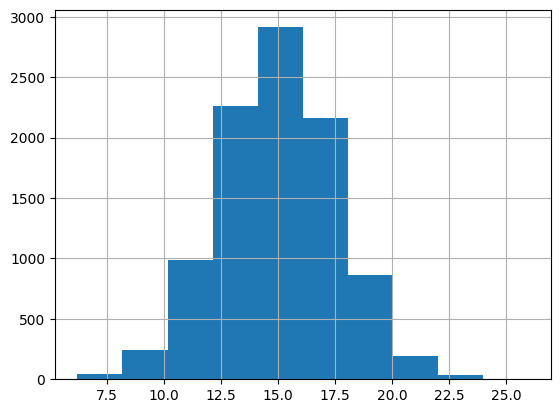

In [40]:
df.fuel_efficiency_mpg.hist()

Question 1
There's one column with missing values. What is it?

In [41]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

vehicle_weight has missing values

Question 2
What's the median (50% percentile) for variable 'horsepower'?

In [42]:
df.horsepower.describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [43]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [44]:
y_train = df_train.fuel_efficiency_mpg.values
y_val= df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values


del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [45]:
n_val, n_test, n_train


(1940, 1940, 5824)

Question 3

We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.

Try both options. For each, train a linear regression model without regularization using the code from the lessons.

For computing the mean, use the training only!

Use the validation dataset to evaluate the models and compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

In [46]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [47]:

def prepare_X(df,mode='zero'):
    df_num = df.select_dtypes(include=[np.number])
    if mode == 'zero':
        df_num = df_num.fillna(0)
    elif mode == 'mean':
        df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
X_test = prepare_X(df_test)

In [48]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [49]:

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [50]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [51]:
rmse(y_val, y_pred)


0.5173782638841185

In [52]:
# mode mean
X_train = prepare_X(df_train, mode='mean')
w_0, w = train_linear_regression(X_train, y_train)

In [53]:
X_val = prepare_X(df_val, mode='mean')
y_pred = w_0 + X_val.dot(w)

In [54]:
round(rmse(y_val, y_pred),2)


0.46

Question 4
Now let's train a regularized linear regression.

For this question, fill the NAs with 0.

Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].

Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

If multiple options give the same best RMSE, select the smallest r.

In [55]:
#Regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [59]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
rmses = {}
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    rmses[r] = rmse(y_val, y_pred)

min(rmses, key=rmses.get)


0.01

Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

In [60]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [61]:
def prepare_X(df,mode='zero'):
    df_num = df.select_dtypes(include=[np.number])
    if mode == 'zero':
        df_num = df_num.fillna(0)
    elif mode == 'mean':
        df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [62]:

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [63]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_results = {}

for seed in seed_list:
    np.random.seed(seed)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train = df_train.fuel_efficiency_mpg.values
    y_val= df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values


    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']


    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)
    X_test = prepare_X(df_test)

    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)

    y_pred = w_0 + X_val.dot(w)
    rmse_results[seed] = rmse(y_val, y_pred)


In [64]:
rmse_results

{0: 0.5206531296297207,
 1: 0.5213388912866506,
 2: 0.5228069974913666,
 3: 0.5159516741255491,
 4: 0.5109129460116937,
 5: 0.5283406460212935,
 6: 0.5313910658190373,
 7: 0.509067038739038,
 8: 0.5147399129482789,
 9: 0.513186590829269}

In [66]:
round(np.std(list(rmse_results.values())),3)

0.007

Question 6

Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

In [67]:
#Regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [69]:
np.random.seed(9)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = df_train.fuel_efficiency_mpg.values
y_val= df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values


del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

#combine train and val'
df_train_combined = pd.concat([df_train, df_val])
y_train_combined = np.concatenate([y_train, y_val])



X_train = prepare_X(df_train_combined)
X_test = prepare_X(df_test)

w_0, w = train_linear_regression_reg(X_train, y_train_combined, r=0.001)

y_pred = w_0 + X_test.dot(w)
rmse(y_test, y_pred)

0.5156261299185628